# Biosensor mass transport and binding reaction calculation tool

## Summary and declarations

###### This notebook page summarises the calculations and formulae laid out in the main page found in this repository to work as a stand alone calculation tool for testing various sensor configurations. Please also find an additional variables page in the repository to use as a reference guide with this tool.**

In [3]:
# Declarations

import math
sqrt=math.sqrt

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Calculate the number of available target molecules with a given biomarker/biofluid pairing

In [4]:
#Inputs

# Use either Mass concentraion (Conc) or M depending on given units

V = 10e-3     # available volume of sample (L)


## Conc = 50  # concentration of target molecule in sample - mass concentration (gram/L)
## Mo = 50    # molar mass of target molecule (g/mol)

## *or*

M = 910e-6        # concentration of target molecule in sample - molarity (mol/L)


In [5]:
# Calculation

N_A = 6.02*1e+23         # avogadros number
## M = Conc/Mo           # molarity (mol/L) *remove '##' if using mass conc, leave if using molarity*
mol = M*V                # total number of moles
Nm = mol*N_A             # number of available molecules


print ("Number of available molecules:" + format(Nm,"10.2E"))

Number of available molecules:  5.48E+18


## Calculate key mass transport and binding kinetics values for a potential device configuration

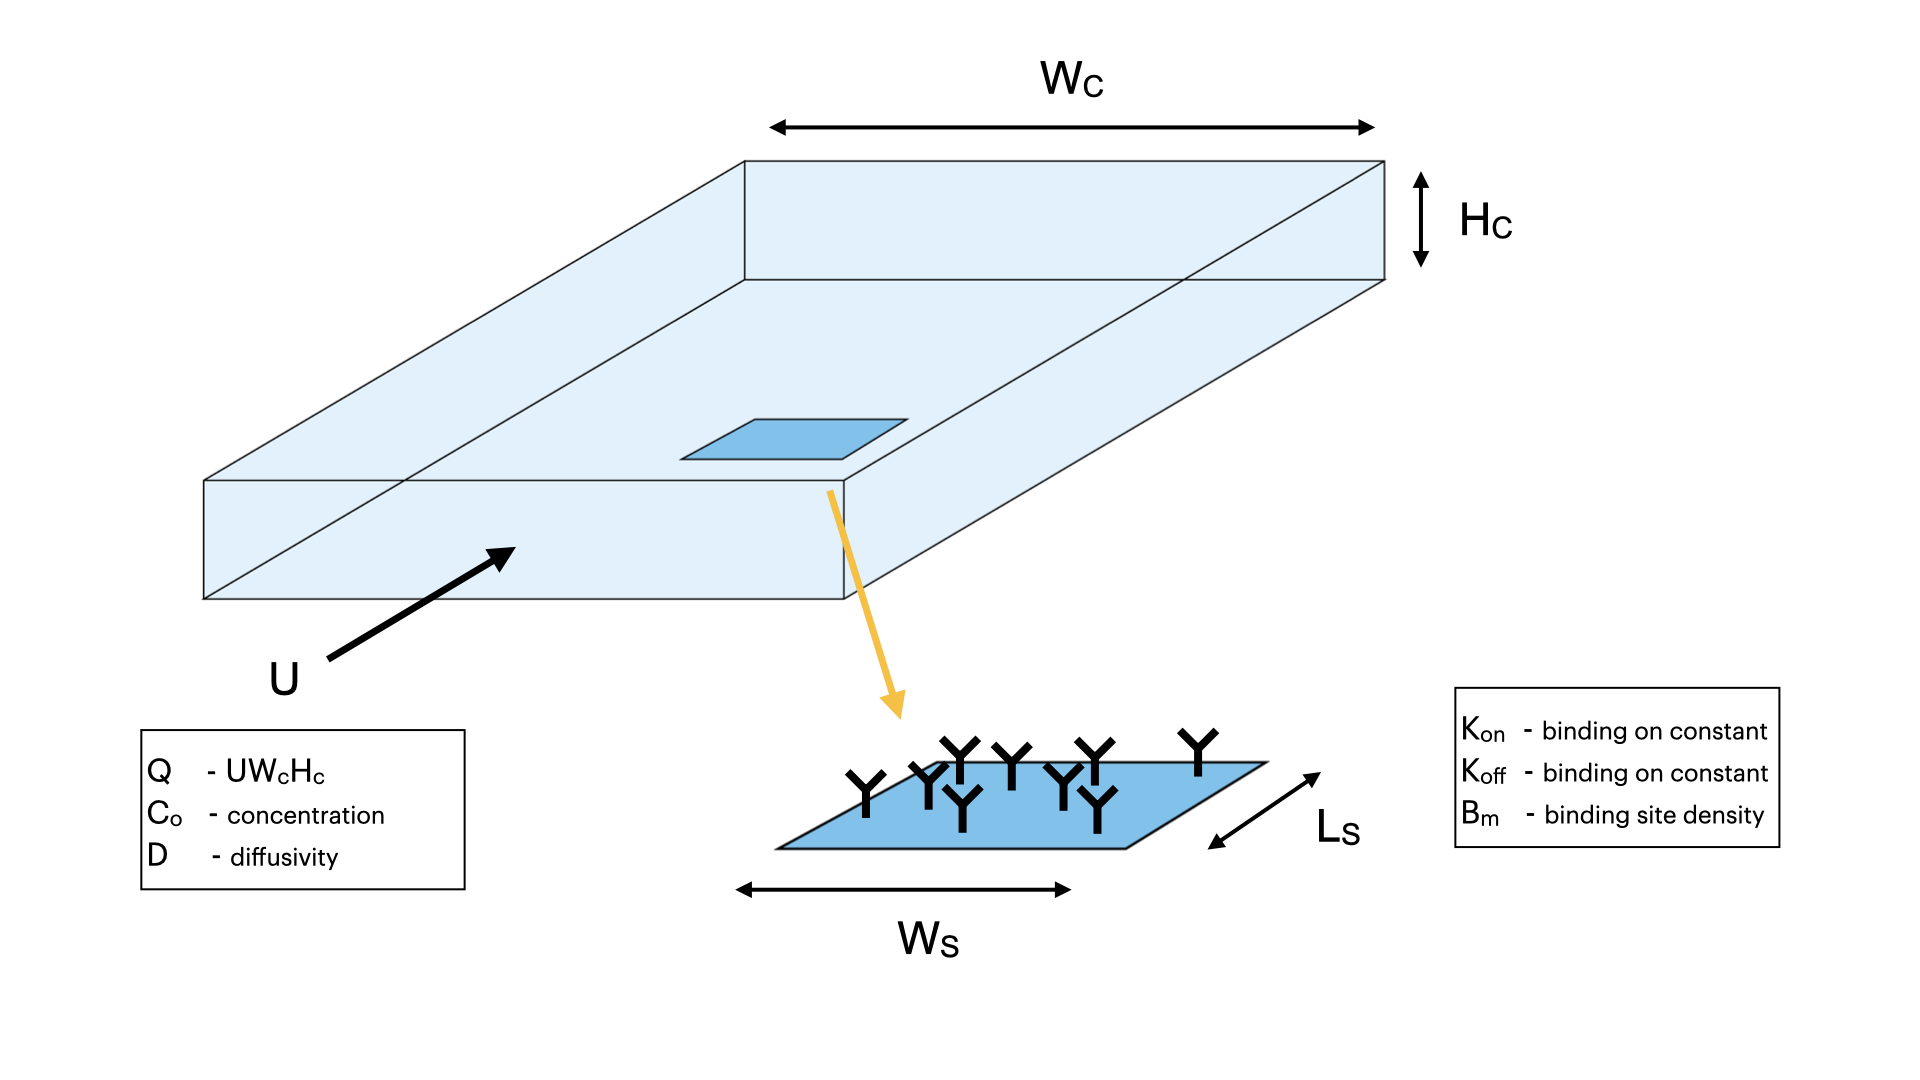

### Input device parameters

In [6]:
## Channel dimensions

Wc = 100e-6   # width of channel (m)
Hc = 100e-6   # height of channel (m)

## Sensor dimensions

Ws = 50e-6   # width of sensor (m)
Ls = 50e-6   # length of sensor (m)

## Biofluid parameters

d = 10       # diffusivity (u m^2/s)
Cu = 10e-15  # concentration (M (molarity - Moles/L))

## Flow

q = 10  # flow rate (uL / min)

## Reaction constants

Kon = 10e+6     # on-rate constant (M^-1 s^-1)
Koff = 10e-3    # off-rate constant (s^-1)
bm = 2e+12      # binding site density (sites/cm^2)
Kd = Koff/Kon   # rate constant (M)
Konu = Kon/1e3  # not in molar


## Unit conversion

D = d / 1e+12        # diffusivity (m^2/s)
Q = (q / 1e+9)/60    # flow rate (m^3/s)
Bm = bm*1e4          # binding site density (sites/m^2)
Co = Cu*1e3          # concentration (mol/m^3)

## Binding surface

Nr = Bm*Ws*Ls    # total binding sites
print ('Total number of binding sites = ' + format(Nr,'10.2E'))


Total number of binding sites =   5.00E+07


### Calculations

In [12]:
## Peclet Numbers

Peh = Q/(Wc*D)
print ('Peh ='+ format(Peh,"10.2E"))
if Peh < 1 :
    print ("Pe(H) < 1, so depletion zone extends far upstream, alternatively the depletion zone would be thinner than the channel.")
else :
    print ("Peh(H) > 1, so depletion zone thinner than channel, alternatively depletion zone would extend far upstream.")    

print('\n')

Lambda = Ls/Hc # ratio of sensor length and channel height
Pes = 6*(Lambda**2)*Peh
print ('Pes ='+ format(Pes,"10.2E"))
if Pes < 1:
    print ("Pe(S) < 1, so depletion zone is thicker than sensor")
else:
    print ("Pe(S) > 1, so depletion zone is thinner than sensor")
    
print('\n')


## Sherwood number F

if Pes > 1:
    F = 0.81*Pes**(1/3) + 0.71*Pes**(-1/6) - 0.2*Pes**(-1/3)
else:
    F = RR(pi*(ln(4/Pes^(1/2)) + 1.06)**(-1))
print('F = ' + format(F,"1.3"))
##print('The Sherwood number (F) depends on Pes, the sensors Peclet number.')
print('\n')

## Flux through depletion zone

Jd = D*Co*Ws*F*N_A    #  total collection rate [molecules/sec]
jd = 1/Jd   # seconds per each molecule
print('Jd = ' + format (Jd,'10.2E'))
print('total collection rate [molecules/sec].')
print('\n')
print('jd = ' + format (jd,'10.2E'))
print('time for one molecule to bind with sensor (s)')
print('\n')

## Dimensionless concentration and fraction of bound receptors in equilibrium

Cd = (Cu/Kd)             # dimensionless concentration 
BeqF = BeqF = Cd/(1+Cd)  # fraction of the available sites bound in equilibrium

print ('Dimensionless concentration = ' + format(Cd,"10.2E"))
print('\n')
print ('Fraction of bound receptors on the sensor surface in equilibrium = ' + format(Cd,"10.2E"))

print('\n')
## Number of bound molecules in equilibrium

Nrb = (Nr*Cu/Kd)     # average number of target molecules bound at equilibrium
print('Average number of target molecules bound at equilibrium = '+ format(Nrb,"10.2E"))

print('\n')
## Damkohler number 

Da = (Konu*Bm*Ls)/(D*F*N_A)

print ('Da = ' + format(Da,'10.2E'))

print('\n')
## Time to reach equilibrium

tR = 1/Koff

if Da < 1:
    tR = tR
else:
    tR = Da*tR

print('tR = ' +format(tR,'10.2E') +' s')
print('(time scale to reach equilibrium)')
print('\n')


Peh =  1.67E+05
Peh(H) > 1, so depletion zone thinner than channel, alternatively depletion zone would extend far upstream.


Pes =  2.50E+05
Pe(S) > 1, so depletion zone is thinner than sensor


F = 51.1


Jd =   1.54E-01
total collection rate [molecules/sec].


jd =   6.50E+00
time for one molecule to bind with sensor (s)


Dimensionless concentration =   1.00E-05


Fraction of bound receptors on the sensor surface in equilibrium =   1.00E-05


Average number of target molecules bound at equilibrium =   5.00E+02


Da =   3.25E+01


tR =   3.25E+03 s
(time scale to reach equilibrium)




## Plot fraction of bound molecules against time

In [13]:
t = 1500 # (seconds) adjust to change time scale on graph 

x = np.arange(0,t,t/30)
y = np.arange(0,Nr,Nr/50)

Phi = ((Cu/Kd)/(1+Cu/Kd))*(1-math.e**(-((Kon*Cu)+Koff)*x))

     
def equilibirum(eq):

    Phieq = ((Cu/Kd)/(1+Cu/Kd))*(1-math.e**(-((Kon*Cu)+Koff)*eq))

    plt.plot(x, Phi, linestyle = "dotted")
    plt.axvline(x = eq)
    plt.axhline(Phieq)
    plt.show()
    
    print ('Fraction of molecules at ' + str(eq) + 's = ' + format(Phieq,"10.2E"))

interact(equilibirum,eq=(0,t,t/(t/40)))

interactive(children=(FloatSlider(value=720.0, description='eq', max=1500.0, step=40.0), Output()), _dom_class…

<function __main__.equilibirum(eq)>